# Plot Stations

In [8]:
import gridpp
import netCDF4
import numpy as np
import pandas as pd
import matplotlib.pylab as plt_lab
import pyproj

### Reading a base forecast file

In [5]:
filename = 'https://thredds.met.no/thredds/dodsC/meps25epsarchive/2019/01/31/meps_subset_2_5km_20190131T18Z.nc'
file = netCDF4.Dataset(filename, "r")

In [6]:
print(file)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format DAP2):
    Conventions: CF-1.6
    institution: Norwegian Meteorological Institute, MET Norway
    creator_url: met.no
    summary: MEPS (MetCoOp-Ensemble Prediction System) is a convection-permitting atmosphere ensemble model covering Scandinavia and the Nordic Seas. It has horizontal resolution of 2.5 km, has 65 vertical levels and 10 members. MEPS is ran four times daily (00,06,12,18) with three-hourly cycling for data assimilation. Member 0 and 1 are ran up to 66 hours, the rest up to 48 hours. Boundary data is from ECMWF, and initial perturbations are based on the SLAF method. Model code based on HARMONIE cy40h1.1
    source: MEPS 2.5km
    min_time: 2019-01-31 18:00:00Z
    max_time: 2019-02-03
    geospatial_lat_min: 51.0
    geospatial_lat_max: 88.0
    geospatial_lon_min: -20.0
    geospatial_lon_max: 80.0
    references: unknown
    license: https://www.met.no/en/free-meteorological-data/Li

In [9]:
print(file.variables["air_temperature_2m"].shape)

(67, 1, 10, 949, 889)


In [10]:
latitudes = file.variables["latitude"][:]
longitudes = file.variables["longitude"][:]
timestep = 0
temperature = file.variables["air_temperature_2m"][timestep,0, 0, :, :]

### Reading the sation locations

In [11]:
real_stations = pd.read_csv('../../code_for_data/stations/stations_id_locs.csv')
real_stations.head()

,station_id,lat,long
0,SN18700,59.9423,10.7200
1,SN80740,66.9035,13.6460
2,SN61630,62.2583,8.2000
3,SN78910,64.6933,12.3295
4,SN8140,61.4255,11.0803


In [12]:
real_stations = real_stations[real_stations.lat > 0]
real_stations.reset_index(drop=True, inplace=True)

In [13]:
lats = real_stations.lat
longs = real_stations.long

### Plot

/tmp/ipykernel_32289/623635593.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt_lab.pcolormesh(longitudes, latitudes, temperature)


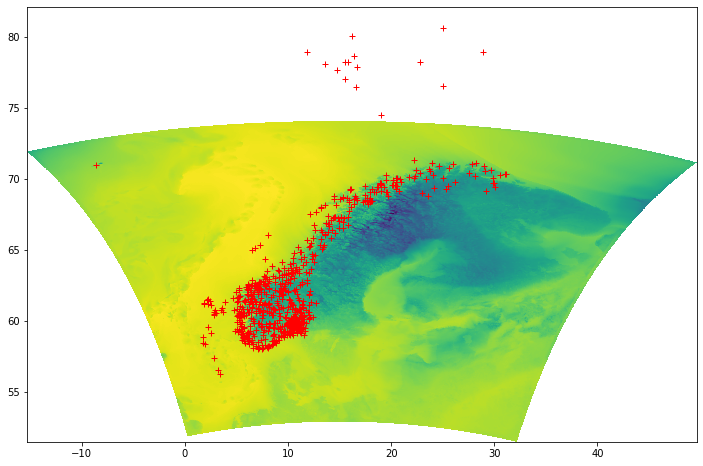

In [14]:
plt_lab.figure(figsize=(12,8))
plt_lab.pcolormesh(longitudes, latitudes, temperature)
for i in range(real_stations.shape[0]):
    plt_lab.plot(longs[i], lats[i] , 'r+')
    #print(i)
plt_lab.show()

/tmp/ipykernel_32289/1009790262.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt_lab.pcolormesh(longitudes, latitudes, temperature)


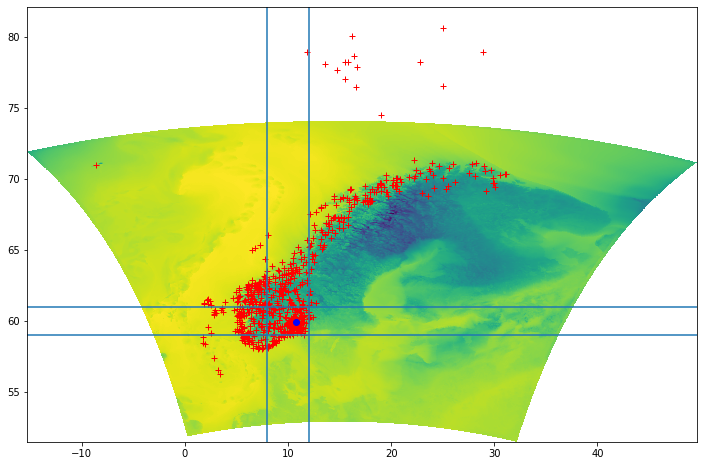

In [20]:
plt_lab.figure(figsize=(12,8))
plt_lab.pcolormesh(longitudes, latitudes, temperature)
for i in range(real_stations.shape[0]):
    plt_lab.plot(longs[i], lats[i] , 'r+')
    #print(i)

plt_lab.plot(10.757933, 59.911491, 'bo')
plt_lab.axhline(61)
plt_lab.axhline(59)
plt_lab.axvline(12)
plt_lab.axvline(8)
plt_lab.show()